In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

import setting
inputType ='file' # or file


In [2]:
setting.process_param

{'refine_param': {'removeDuplication': {'flag': True},
  'staticFrequency': {'flag': True, 'frequency': None}},
 'outlier_param': {'certainErrorToNaN': {'flag': True},
  'unCertainErrorToNaN': {'flag': True, 'param': {'neighbor': [0.5, 0.6]}},
  'data_type': 'air'},
 'imputation_param': {'serialImputation': {'flag': True,
   'imputation_method': [{'min': 0,
     'max': 1,
     'method': 'linear',
     'parameter': {}},
    {'min': 2,
     'max': 3,
     'method': 'brits',
     'parameter': {'model_address': '/Users/bunnyjw/Git/DL/Models/brits/air_indoor_요양원/ICL1L2000017'}},
    {'min': 4, 'max': 100, 'method': 'mean', 'parameter': {}}],
   'totalNonNanRatio': 60}}}

In [3]:
# Declare your own data
input_data = setting.inputControl(inputType)
# Make noise
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)

In [4]:
# Preprocessing
from KETIPrePartialDataPreprocessing import data_preprocessing
column_name = input_test_data.columns[0]
input_data =  input_test_data[[column_name]]

partialP = data_preprocessing.packagedPartialProcessing(setting.process_param)
output = partialP.allPartialProcessing(input_data)

getDataWithCertainNaN
getDataWithUncertainNaN
3.87578376629425 4.6509405195530995
after Drop NaN Data
===== NaN data Ratio summary ======
temp    0.08
dtype: float64
birts_imputation
No Brits Folder
===== NaN data Ratio summary ======
temp    0.01
dtype: float64


key:  original Data Leangth: 227438 Data NaN Length: temp    17428
dtype: int64


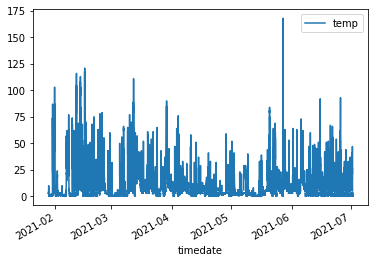

key:  refined_data Data Leangth: 222429 Data NaN Length: temp    18071
dtype: int64


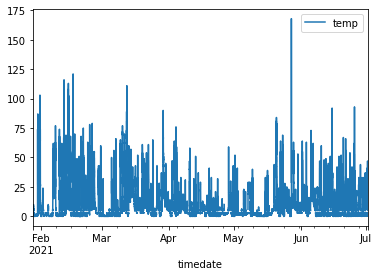

key:  datawithMoreCertainNaN Data Leangth: 222429 Data NaN Length: temp    18446
dtype: int64


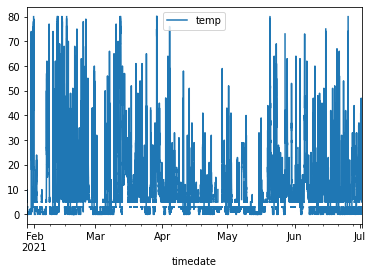

key:  datawithMoreUnCertainNaN Data Leangth: 222429 Data NaN Length: temp    18446
dtype: int64


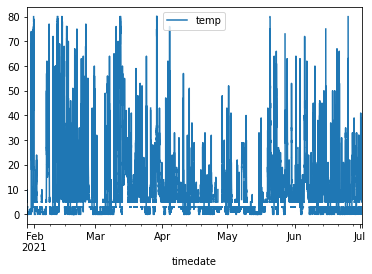

key:  imputed_data Data Leangth: 222429 Data NaN Length: temp    1394
dtype: int64


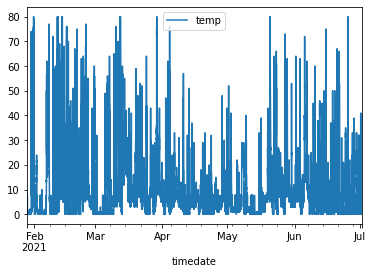

In [5]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    temp.plot()
    plt.show()

## Code Test

In [6]:
test_data = output['imputed_data']
test_data.isna().sum()

temp    1394
dtype: int64

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decompfreq = 30
result = seasonal_decompose(test_data, model='additive', freq=decompfreq)

ModuleNotFoundError: No module named 'statsmodels'